# Project 3 for CSE142
## CIFAR-10 Classification

Importing necessary packages:

- tensorflow/keras: API to build and train models
- matplotlib: generate graphs
- numpy: perform array operations
- pandas: to work with dataframes
- pickle: for serializing and de-serializing a Python object
- os: for file paths

In [24]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
import numpy as np
import pandas as pd
# import pickle
# import os, os.path
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.optimizers import Adam

### *Initialize relevant variables*

In [2]:
labels_df = pd.read_csv("Semi1_Labels.csv") #change this for different versions
train_path = 'Train_Image' 
test_path = 'Test_Image' 
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
labels_df

,Train Label
0,NAN
1,dog
2,NAN
3,airplane
4,NAN
...,...
9995,NAN
9996,NAN
9997,airplane
9998,NAN


## Defining some functions

In [3]:
def get_image(img_number):
    img = mpimg.imread(train_path + f"/{img_number}.png") 
    return img
def get_test_image(img_number):
    img = mpimg.imread(test_path + f"/{img_number}.png") 
    return img
def get_label(arr):
    max_index_col = np.argmax(arr, axis=0)
    return labels[max_index_col]

In [4]:
# plt.imshow(get_image(7777))

In [5]:
# plt.imshow(get_test_image(999))

**Function that prints image info**

In [6]:
def get_img_info(img):
    rows,cols,channels = img.shape 
    img_size = rows*cols*channels # channels means rgb colors i think, so should always be 3?
    img_to_1D = img.reshape(img_size) #numPy reshape
    print("rows, cols, channels:", rows, cols, channels)
    print("image size:", img_size)
#     print("image original:", img)
#     print("image reshape:", img_to_1D)
#     return img_to_1D

In [7]:
# get_img_info(get_image(3)) 

## Preprocessing the  Data

We need to separate the labeled data from the unlabeled

Also need to encode labels as numbers instead of strings

In [8]:
#is_unlabelled = labels_df["Train Label"] == NAN
labelled = (labels_df["Train Label"]!= "NAN")
unlabelled = (labels_df["Train Label"] == "NAN")

unlabelled_data = (labels_df[unlabelled])
print(unlabelled_data)

labelled_data = (labels_df[labelled])
print(labelled_data)

     Train Label
0            NAN
2            NAN
4            NAN
5            NAN
6            NAN
...          ...
9994         NAN
9995         NAN
9996         NAN
9998         NAN
9999         NAN

[8000 rows x 1 columns]
     Train Label
1            dog
3       airplane
8           deer
18          frog
26          deer
...          ...
9977        deer
9988        frog
9990  automobile
9992        bird
9997    airplane

[2000 rows x 1 columns]


In [9]:
labeled = []
unlabeled = []

labeled = labelled_data["Train Label"].tolist()
unlabeled = unlabelled_data["Train Label"].tolist()

# print (labeled) 
# print (unlabeled) 

In [10]:
#col = labels_df.columns
#for i, entry in enumerate(labels_df[col[0]]):
 #   if (entry == 'NAN'):
  #      unlabeled.append(i)
   # else:
   #     labeled.append([i, entry])
# print("labeled", labeled)
# print("unlabeled", unlabeled)


2000


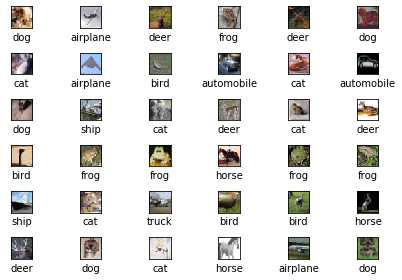

In [11]:
# Need to reshape training data and labels
train_images, train_labels, test_images, test_labels = [], [], [], []
for i in labelled_data.iterrows():
    train_images.append(get_image(i[0]))
    train_labels.append(i[1]['Train Label'])
print(len(train_images))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(train_labels[i])
plt.show()

### TODO: One-Hot Encoding

In [12]:
#change this to one-hot
for i in range(len(train_labels)):
    for j in range(len(labels)):
        if train_labels[i] == labels[j]:
            train_labels[i] = j
# print (train_labels)

In [13]:
#split labeled data so that we have some labeled testing data 80/20
test_images =  np.array(train_images[1600:])
train_images = np.array(train_images[:1600])
test_labels = np.array(train_labels[1600:])
train_labels = np.array(train_labels[:1600])
print(len(train_images), len(train_labels), len(test_images), len(test_labels))


1600 1600 400 400


## Baseline Model

### Convolutional Neural Network

As input, a CNN takes tensors of shape (height, width, channels) = (32, 32, 3)

This is based on https://www.tensorflow.org/tutorials/images/cnn

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

In [14]:
#Is this stopping too soon?
callback1 = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True)
callback2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0, patience=3, restore_best_weights=True)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 



NameError: name 'model' is not defined

In [ ]:
history = model.fit(train_images, train_labels, epochs=100, 
                    validation_data=(test_images, test_labels), callbacks=[callback2])

## Augmenting the Model



### Label some of our unlabeled data

In [15]:
new_labels = [];
new_images = [];

for j,i in enumerate(unlabelled_data.iterrows()):
    if j < 500:
        new_images.append(get_image(i[0]))
#         print(i[0])


predictions = model.predict(np.array(new_images))
for i in predictions:
    new_labels.append(get_label(i))
    
print(len(new_images), len(new_labels))

NameError: name 'model' is not defined

In [ ]:
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    plt.grid(False)
    plt.imshow(new_images[i])
    plt.xlabel(new_labels[i])
plt.show()

In [ ]:
new_train_images = np.concatenate((train_images, new_images), axis=0)
new_train_labels = np.concatenate((train_labels, new_labels), axis=0)

for i in range(len(new_train_labels)):
    for j in range(len(labels)):
        if new_train_labels[i] == labels[j]:
            new_train_labels[i] = j
            
new_train_labels = tf.strings.to_number(new_train_labels)
            
print(len(new_train_images),len(new_train_labels))

print(new_train_labels, train_labels)


In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10))
model2.summary()

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) 

history2 = model2.fit(new_train_images, new_train_labels, epochs=100, 
                    validation_data=(test_images, test_labels), callbacks=[callback1])

## ResNet 50 

As per TA recommendation

## TODO: figure this out

In [30]:
# resnet = ResNet50(weights="imagenet", include_top=False, input_shape=(128,128,3), pooling='max')
resnet = ResNet50(include_top=False, input_shape=(128,128,3), pooling='max')

for layer in resnet.layers:
#     print(layer)
    layer.trainable = False

    
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
normal = tf.keras.layers.BatchNormalization()
dropout =tf.keras.layers.Dropout(0.4)
output = tf.keras.layers.Dense(10, activation='softmax')(resnet.output)


In [31]:
res = tf.keras.models.Model(resnet.input, output)
res.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [32]:
augmented_model = tf.keras.models.Sequential()
augmented_model.add(tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=2, padding='same', activation='relu', input_shape=(32,32,3)))
augmented_model.add(tf.keras.layers.BatchNormalization())
augmented_model.add(tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=2, padding='same', activation='relu'))
augmented_model.add(tf.keras.layers.BatchNormalization())
augmented_model.add(res)

In [33]:
augmented_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose_4 (Conv2DTr (None, 64, 64, 3)         84        
_________________________________________________________________
batch_normalization_7 (Batch (None, 64, 64, 3)         12        
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 128, 128, 3)       84        
_________________________________________________________________
batch_normalization_8 (Batch (None, 128, 128, 3)       12        
_________________________________________________________________
model_2 (Model)              (None, 10)                23608202  
Total params: 23,608,394
Trainable params: 20,670
Non-trainable params: 23,587,724
_________________________________________________________________


In [ ]:
augmented_model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = augmented_model.fit(train_images, train_labels, epochs=20, batch_size=32, verbose=1,
                    validation_data=(test_images, test_labels), callbacks=[callback1])

Train on 1600 samples, validate on 400 samples
Epoch 1/20


In [ ]:
augmented_model2 = tf.keras.models.Sequential()
augmented_model2.add(tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=2, padding='same', activation='relu', input_shape=(32,32,3)))
augmented_model2.add(tf.keras.layers.BatchNormalization())
augmented_model2.add(tf.keras.layers.Conv2DTranspose(3, (3, 3), strides=2, padding='same', activation='relu'))
augmented_model2.add(tf.keras.layers.BatchNormalization())
augmented_model2.add(res)

augmented_model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = augmented_model2.fit(new_train_images, new_train_labels, epochs=100, 
                    validation_data=(test_images, test_labels), callbacks=[callback1])

# Predictions

Using our model and ResNet


## Write predictions to csv



In [ ]:
import csv

f = open("submission.csv","w+")

pass